# Adam Sohn Project 2 Notebook
#### Hypothesis
Areas where home ownership is relatively less affordable will similarly be
relatively less affordable for renters. This will manifest in a higher rental rates
and rental eviction rates.
 
#### Graph Product 
	1 Format: Bar / Dot 
    - Median Listing Price on left axis, median-household-income on right axis, 20 cities on x axis
    - median-gross-rent on left axis, median-household-income on right axis, 20 cities on x axis
    - home_own_afrdblty on left axis, rent_afrdblty on right axis, 20 cities on x axis
    
    2 Format: home_own_afrdblty on y axis, rent_afrdblty on x axis. Also have df sorted on heat. 
	Viewport Variant:
	- heat = eviction-rate 
    - heat = pct-renter-occupied 
    - heat = poverty-rate 

#### Importing libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Importing Datasets (Raw)

In [2]:
#Eviction
cities_df = pd.read_csv('cities.csv')

#Realtor
RDC_county_df = pd.read_csv('RDC_InventoryCoreMetrics_County_Hist.csv', low_memory=False)

#### GRC of data

In [3]:
#Overall file line count
print(f'cities_df is {len(cities_df)} lines long')
print(f'RDC_county_df is {len(RDC_county_df)} lines long\n')

#Head
print('___cities_df head___')
print(cities_df.head(1))
print('___RDC_county_df head___')
print(RDC_county_df.head(1))

#Median Listing Price range
print(f"Range of RDC_county_df['Median Listing Price']: ${RDC_county_df['Median Listing Price'].min()} - ${RDC_county_df['Median Listing Price'].max()} ")

cities_df is 502872 lines long
RDC_county_df is 79001 lines long

___cities_df head___
    GEOID  year    name parent-location  population  poverty-rate  \
0  100100  2000  Abanda         Alabama         NaN           NaN   

   renter-occupied-households  pct-renter-occupied  median-gross-rent  \
0                         NaN                  NaN                NaN   

   median-household-income   ...    pct-nh-pi  pct-multiple  pct-other  \
0                      NaN   ...          NaN           NaN        NaN   

   eviction-filings  evictions  eviction-rate  eviction-filing-rate  low-flag  \
0               NaN        NaN            NaN                   NaN         0   

   imputed  subbed  
0        0       0  

[1 rows x 27 columns]
___RDC_county_df head___
                 Month  CountyFIPS       CountyName  Nielsen Rank Footnote  \
0  2018-11-01 00:00:00      6037.0  Los Angeles, CA           1.0      NaN   

   Median Listing Price  Median Listing Price M/M  Median Listing Pr

#### Parsing data to determine mapping of cities (Eviction) to counties (Realtor) for 20 chosen cities
- Finding exact names of 'cities' in 'cities_df' <br>
- Finding exact names of 'counties' in 'RDC_county_df'. 

Note: Cities containing multiple counties (NYC, Kansas City) were excluded for the sake of insufficient data in set to perform weighted average.

In [4]:
def beg_with (srch_strng, df = cities_df, field = 'name'):
    '''Returns 'True'('False') srch_string in (not in) df '''
    print(srch_strng, end = ': ')
    print(srch_strng in (list(set(df[f'{field}'].loc[df[f'{field}'].str.startswith(srch_strng, na = False)]))))
    return

cities_lst = ['Detroit', 'Atlanta', 'San Francisco', 'Newark', 'Denver', 'Las Vegas', 'Tulsa', 'Seattle', 'El Paso', 'St. Louis', 'Chicago', 'Miami', 'Cleveland', 'Los Angeles', 'Dallas', 'Minneapolis', 'Boston', 'San Diego', 'Philadelphia', 'Orlando']
counties_lst = ['Wayne, MI', 'Fulton, GA', 'San Francisco, CA', 'Essex, NJ', 'Denver, CO', 'Clark, NV', 'Tulsa, OK','King, WA', 'El Paso, TX', 'St. Louis, MO','Cook, IL', 'Miami-Dade, FL', 'Cuyahoga, OH', 'Los Angeles, CA', 'Dallas, TX', 'Hennepin, MN','Suffolk, MA', 'San Diego, CA', 'Philadelphia, PA', 'Orange, FL']

print('___CITIES___\n')
[beg_with(x, cities_df, 'name') for x in cities_lst]

print('\n___COUNTIES___\n')
[beg_with(x, RDC_county_df, 'CountyName') for x in counties_lst]
pass

___CITIES___

Detroit: True
Atlanta: True
San Francisco: True
Newark: True
Denver: True
Las Vegas: True
Tulsa: True
Seattle: True
El Paso: True
St. Louis: True
Chicago: True
Miami: True
Cleveland: True
Los Angeles: True
Dallas: True
Minneapolis: True
Boston: True
San Diego: True
Philadelphia: True
Orlando: True

___COUNTIES___

Wayne, MI: True
Fulton, GA: True
San Francisco, CA: True
Essex, NJ: True
Denver, CO: True
Clark, NV: True
Tulsa, OK: True
King, WA: True
El Paso, TX: True
St. Louis, MO: True
Cook, IL: True
Miami-Dade, FL: True
Cuyahoga, OH: True
Los Angeles, CA: True
Dallas, TX: True
Hennepin, MN: True
Suffolk, MA: True
San Diego, CA: True
Philadelphia, PA: True
Orange, FL: True


#### Align on most current, shared time

In [5]:
print(f"cities_df time range is {cities_df['year'].min()} - {cities_df['year'].max()}")
print(list(set(cities_df['year'].tolist())))
print(f"RDC_county_df time range is {RDC_county_df['Month'].min()} - {RDC_county_df['Month'].max()}")
print(list(set(RDC_county_df['Month'].tolist())))


cities_df time range is 2000 - 2016
[2016, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
RDC_county_df time range is * year-over-year figures impacted in this area by MLS changes to the pending status definition, please contact economics@realtor.com for more details. - 2018-11-01 00:00:00
['2015-10-01 00:00:00', '2017-10-01 00:00:00', '2018-08-01 00:00:00', '2017-08-01 00:00:00', '2018-07-01 00:00:00', '2012-06-01 00:00:00', '2018-05-01 00:00:00', '2017-01-01 00:00:00', '2016-05-01 00:00:00', '2013-03-01 00:00:00', '2018-10-01 00:00:00', '2014-05-01 00:00:00', '2014-12-01 00:00:00', '2017-03-01 00:00:00', '2017-09-01 00:00:00', '2013-09-01 00:00:00', '2013-04-01 00:00:00', '2014-06-01 00:00:00', '2015-04-01 00:00:00', '2012-10-01 00:00:00', '2013-07-01 00:00:00', '2014-04-01 00:00:00', '2018-01-01 00:00:00', '2015-06-01 00:00:00', '2013-12-01 00:00:00', '2013-11-01 00:00:00', '2014-07-01 00:00:00', '2017-11-01 00:00:00', '2017-05-01 00:

#### Finding
Above time range for RDC_county_df picked up a string. This is interesting, but not a problem, as we will be droping data not from paired time.

2016 is the most recent paired time. 
- cities_df: 'year' = 2016
- RDC_county_df: 'Month' = '2016-[01-12]-01 00:00:00' where [01-12] represents range(1-12)

Conclusion: Choose '2016-06-01 00:00:00' to represent 2016 data for RDC_county_df to minimize error range.

#### Reducing Dataset
Eliminate city/county values from both imported dfs that are not in cities_lst and counties_lst lists. Also eliminate times other than '2016-06-01 00:00:00'. Time will not be a variable.

In [6]:
#Creating copies of dfs for clean mutating
RDC_county_df_cln = RDC_county_df.copy()
cities_df_cln = cities_df.copy()

#Eliminate city/county values from both imported dfs that are not in cities_lst and counties_lst lists
print('Place shrink')
print(f'RDC_county_df_cln is {len(RDC_county_df_cln)} lines long')
RDC_county_df_cln = RDC_county_df_cln[RDC_county_df_cln.CountyName.isin(counties_lst)]
print(f'RDC_county_df_cln is {len(RDC_county_df_cln)} lines long')

print(f'cities_df_cln is {len(cities_df_cln)} lines long')
cities_df_cln = cities_df_cln[cities_df_cln.name.isin(cities_lst)]
print(f'cities_df_cln is {len(cities_df_cln)} lines long')


#Eliminate times other than '2016-06-01 00:00:00'
print('\nTime shrink')
print(f'RDC_county_df_cln is {len(RDC_county_df_cln)} lines long')
RDC_county_df_cln = RDC_county_df_cln[RDC_county_df_cln.Month == '2016-06-01 00:00:00']
print(f'RDC_county_df_cln is {len(RDC_county_df_cln)} lines long')
print(f"RDC_county_df_cln time range is {RDC_county_df_cln['Month'].min()} - {RDC_county_df_cln['Month'].max()}")

print(f'cities_df_cln is {len(cities_df_cln)} lines long')
cities_df_cln = cities_df_cln[cities_df_cln.year.isin(['2016'])]
print(f'cities_df_cln is {len(cities_df_cln)} lines long')
print(f"cities_df_cln time range is {cities_df_cln['year'].min()} - {cities_df_cln['year'].max()}")

#Eliminate population < 50000 to rid of errors with city name showing in multiple states
print('\nDuplicate Cities shrink')
print(f'cities_df_cln is {len(cities_df_cln)} lines long')
cities_df_cln = cities_df_cln[cities_df_cln.population > 50000]
print(f'cities_df_cln is {len(cities_df_cln)} lines long')

# print(cities_df_cln)
# print(RDC_county_df_cln)

Place shrink
RDC_county_df_cln is 79001 lines long
RDC_county_df_cln is 1580 lines long
cities_df_cln is 502872 lines long
cities_df_cln is 1513 lines long

Time shrink
RDC_county_df_cln is 1580 lines long
RDC_county_df_cln is 20 lines long
RDC_county_df_cln time range is 2016-06-01 00:00:00 - 2016-06-01 00:00:00
cities_df_cln is 1513 lines long
cities_df_cln is 89 lines long
cities_df_cln time range is 2016 - 2016

Duplicate Cities shrink
cities_df_cln is 89 lines long
cities_df_cln is 20 lines long


#### Join cities_df_cln and RDC_county_df_cln

In [7]:
#Creating dataframe mapping city names to county names
data = {'name': cities_lst, 'CountyName': counties_lst}
citycounty = pd.DataFrame(data, columns = ['name','CountyName'])
print(citycounty)

#Adding city name column to RDC_county_df_cln 
RDC_county_df_cln = pd.merge(RDC_county_df_cln, citycounty, on='CountyName')
RDC_county_df_cln

#Setting index of both RDC_county_df_cln and cities_df_cln to city 'name'
RDC_county_df_cln.set_index('name')
cities_df_cln.set_index('name')

#Merging df
df_merge = pd.merge(RDC_county_df_cln, cities_df_cln, on='name')

             name         CountyName
0         Detroit          Wayne, MI
1         Atlanta         Fulton, GA
2   San Francisco  San Francisco, CA
3          Newark          Essex, NJ
4          Denver         Denver, CO
5       Las Vegas          Clark, NV
6           Tulsa          Tulsa, OK
7         Seattle           King, WA
8         El Paso        El Paso, TX
9       St. Louis      St. Louis, MO
10        Chicago           Cook, IL
11          Miami     Miami-Dade, FL
12      Cleveland       Cuyahoga, OH
13    Los Angeles    Los Angeles, CA
14         Dallas         Dallas, TX
15    Minneapolis       Hennepin, MN
16         Boston        Suffolk, MA
17      San Diego      San Diego, CA
18   Philadelphia   Philadelphia, PA
19        Orlando         Orange, FL


#### Adding custom columns
- home_own_afrdblty = Realtor.Median Listing Price / Eviction.median-household-income Dependent 
- rent_afrdblty = Eviction.median-gross-rent / Eviction.median-household-income Dependent 

In [40]:
df_merge['home_own_afrdblty'] = df_merge['Median Listing Price'] / df_merge['median-household-income']
df_merge.set_index('name')
# print(df_merge['home_own_afrdblty'])

df_merge['rent_afrdblty'] = 100*df_merge['median-gross-rent'] / df_merge['median-household-income']

print(df_merge[['name', 'median-gross-rent', 'median-household-income', 'home_own_afrdblty' ,'rent_afrdblty', 'eviction-rate','poverty-rate', 'pct-renter-occupied']])
print(df_merge.dtypes)

             name  median-gross-rent  median-household-income  \
14  San Francisco            1,558.0                 81,294.0   
0     Los Angeles            1,209.0                 50,205.0   
2       San Diego            1,377.0                 66,116.0   
5         Seattle            1,185.0                 70,594.0   
15         Boston            1,320.0                 55,777.0   
16         Denver              962.0                 53,637.0   
3           Miami              971.0                 31,051.0   
12        Atlanta              975.0                 47,527.0   
4          Dallas              863.0                 43,781.0   
10    Minneapolis              869.0                 51,480.0   
17         Newark              973.0                 33,139.0   
11        Orlando            1,003.0                 42,318.0   
1         Chicago              965.0                 48,522.0   
6       Las Vegas              975.0                 50,202.0   
19          Tulsa        

#### Formating floats as only 2 decimals

In [9]:
pd.options.display.float_format = '{:,.1f}'.format
df_merge.hide_index = True

#### Outpupt Graphics: Eviction Rate relation to housing affordability

In [10]:
df_merge[['name', 'home_own_afrdblty' ,'rent_afrdblty', 'eviction-rate']].sort_values(by = 'eviction-rate', ascending = False)

,name,home_own_afrdblty,rent_afrdblty,eviction-rate
19,Tulsa,5.4,1.8,7.8
7,Detroit,3.5,2.9,5.2
12,Atlanta,8.2,2.1,5.1
9,Cleveland,5.0,2.5,4.5
13,St. Louis,6.0,2.1,3.9
8,Philadelphia,4.4,2.4,3.5
6,Las Vegas,4.8,1.9,3.5
11,Orlando,7.0,2.4,3.0
16,Denver,9.9,1.8,2.3
3,Miami,14.5,3.1,2.0


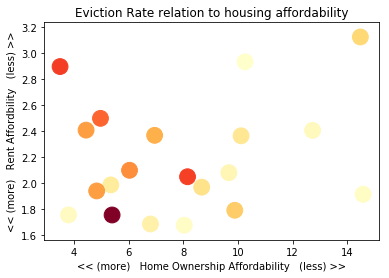

In [11]:
x = df_merge['home_own_afrdblty']
y = df_merge['rent_afrdblty']
z = df_merge['eviction-rate']
    
plt.scatter(x, y, c=z, s=250, cmap='YlOrRd')
plt.title('Eviction Rate relation to housing affordability')
plt.xlabel('<< (more)   Home Ownership Affordability   (less) >>')
plt.ylabel('<< (more)   Rent Affordbility   (less) >>')

plt.show()

#### Output Graphics: Percentage of rentals in relation to housing affordability

In [12]:
df_merge[['name', 'home_own_afrdblty' ,'rent_afrdblty', 'pct-renter-occupied']].sort_values(by = 'pct-renter-occupied', ascending = False)

,name,home_own_afrdblty,rent_afrdblty,pct-renter-occupied
17,Newark,10.3,2.9,78.3
3,Miami,14.5,3.1,69.0
15,Boston,10.1,2.4,65.7
11,Orlando,7.0,2.4,63.8
14,San Francisco,14.6,1.9,63.6
0,Los Angeles,12.7,2.4,63.2
9,Cleveland,5.0,2.5,57.8
4,Dallas,8.7,2.0,57.7
12,Atlanta,8.2,2.1,56.4
13,St. Louis,6.0,2.1,56.1


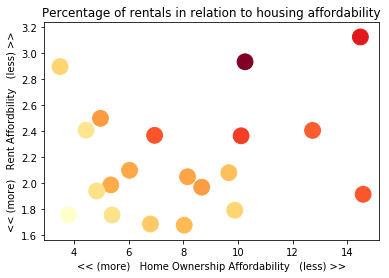

In [13]:
x = df_merge['home_own_afrdblty']
y = df_merge['rent_afrdblty']
z = df_merge['pct-renter-occupied']
    
plt.scatter(x, y, c=z, s=250, cmap='YlOrRd')
plt.title('Percentage of rentals in relation to housing affordability')
plt.xlabel('<< (more)   Home Ownership Affordability   (less) >>')
plt.ylabel('<< (more)   Rent Affordbility   (less) >>')

plt.show()

#### Output Graphics: Poverty rate in relation to housing affordability

In [14]:
df_merge[['name', 'home_own_afrdblty' ,'rent_afrdblty', 'poverty-rate']].sort_values(by = 'poverty-rate', ascending = False)

,name,home_own_afrdblty,rent_afrdblty,poverty-rate
7,Detroit,3.5,2.9,35.5
9,Cleveland,5.0,2.5,31.4
17,Newark,10.3,2.9,26.4
3,Miami,14.5,3.1,23.7
13,St. Louis,6.0,2.1,21.7
8,Philadelphia,4.4,2.4,21.0
4,Dallas,8.7,2.0,20.5
12,Atlanta,8.2,2.1,19.3
1,Chicago,5.3,2.0,18.4
18,El Paso,3.8,1.8,17.9


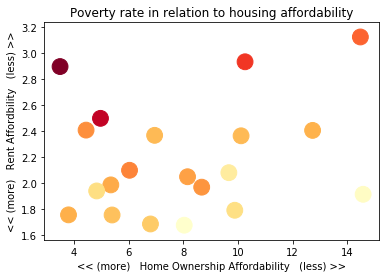

In [15]:
x = df_merge['home_own_afrdblty']
y = df_merge['rent_afrdblty']
z = df_merge['poverty-rate']
    
plt.scatter(x, y, c=z, s=250, cmap='YlOrRd')
plt.title('Poverty rate in relation to housing affordability')
plt.xlabel('<< (more)   Home Ownership Affordability   (less) >>')
plt.ylabel('<< (more)   Rent Affordbility   (less) >>')

plt.show()

#### Output Graphics: Median Listing Price on left axis, median-household-income on right axis, 20 cities on x axis

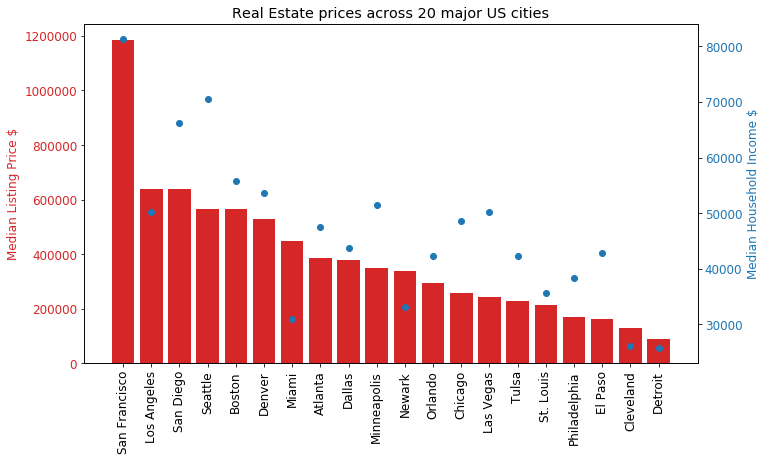

In [51]:
df_merge = df_merge.sort_values(by = 'Median Listing Price', ascending = False)
plt.rcParams.update({'font.size': 12})
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_ylabel('Median Listing Price $', color=color)
ax1.bar(df_merge['name'], df_merge['Median Listing Price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation = 90.0)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Median Household Income $', color=color)  # we already handled the x-label with ax1
ax2.scatter(df_merge['name'], df_merge['median-household-income'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(axis='x', labelrotation = 90.0)

plt.subplots_adjust(bottom=10.4, top=10.99)
plt.title('Real Estate prices across 20 major US cities')

fig = plt.gcf()
fig.set_size_inches(11,8)
plt.show()

#### Output Graphics: median-gross-rent on left axis, median-household-income on right axis, 20 cities on x axis

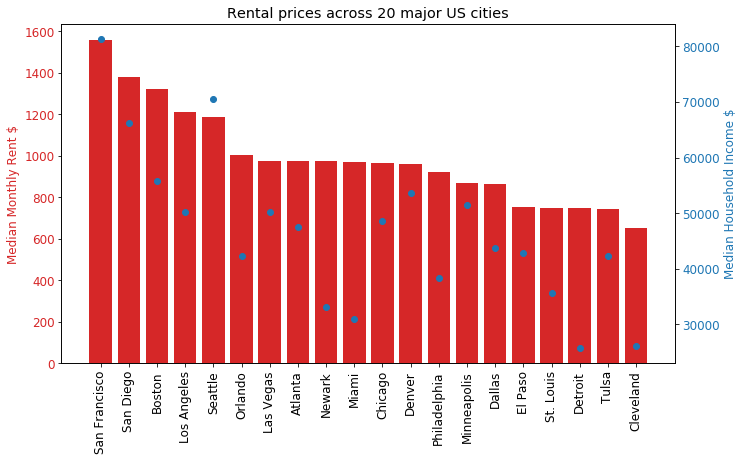

In [17]:
df_merge = df_merge.sort_values(by = 'median-gross-rent', ascending = False)
plt.rcParams.update({'font.size': 12})
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_ylabel('Median Monthly Rent $', color=color)
ax1.bar(df_merge['name'], df_merge['median-gross-rent'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation = 90.0)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Median Household Income $', color=color)  # we already handled the x-label with ax1
ax2.scatter(df_merge['name'], df_merge['median-household-income'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(axis='x', labelrotation = 90.0)

plt.subplots_adjust(bottom=10.4, top=10.99)
plt.title('Rental prices across 20 major US cities')

fig = plt.gcf()
fig.set_size_inches(11,8)
plt.show()

#### Output Graphics: home_own_afrdblty on left axis, rent_afrdblty on right axis, 20 cities on x axis

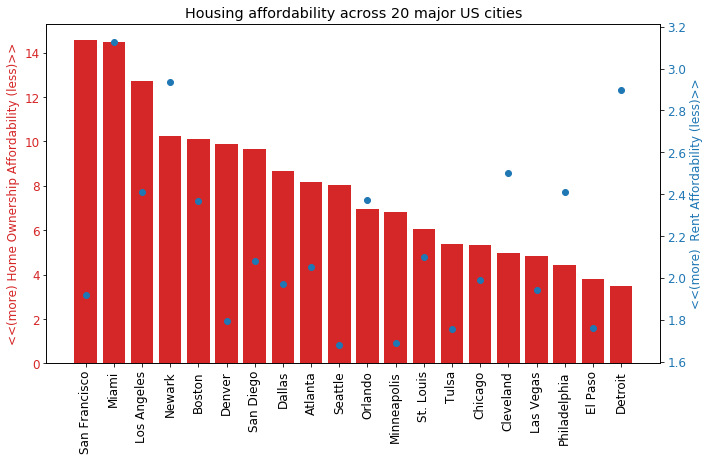

In [18]:
df_merge = df_merge.sort_values(by = 'home_own_afrdblty', ascending = False)
plt.rcParams.update({'font.size': 12})
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_ylabel('<<(more) Home Ownership Affordability (less)>>', color=color)
ax1.bar(df_merge['name'], df_merge['home_own_afrdblty'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation = 90.0)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('<<(more)  Rent Affordability (less)>>', color=color)  # we already handled the x-label with ax1
ax2.scatter(df_merge['name'], df_merge['rent_afrdblty'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(axis='x', labelrotation = 90.0)

plt.subplots_adjust(bottom=10.4, top=10.99)
plt.title('Housing affordability across 20 major US cities')

fig = plt.gcf()
fig.set_size_inches(11,8)
plt.show()